In [1]:
import pandas as pd
from scipy.optimize import lsq_linear
import numpy as np

# taxis_filt = pd.read_csv('taxis_filt.csv')
# lion_filt = pd.read_csv('lion_filt2.csv')

In [2]:
trip_filt_idx = taxis_filt.index
num_segments = lion_filt.shape[0]
A = np.zeros([len(trip_filt_idx), num_segments])

for i in trip_filt_idx:
    seg_coefs = np.zeros(num_segments)
    
    taxis_ids1 = taxis_filt.loc[i,'seg_ids'][1:-1].split(', ')
    taxis_ids2 = [int(m) for m in taxis_ids1]
    
    taxis_lens1 = taxis_filt.loc[i,'seg_lengths'][1:-1].split(', ')
    taxis_lens2 = [float(n) for n in taxis_lens1]
    
    seg_coefs[taxis_ids2] = taxis_lens2
    A[i] = seg_coefs

In [3]:
A.shape

(55222, 16318)

In [4]:
lf2 = lion_filt[lion_filt['path_count'] == 0]
A2 = np.delete(A, lf2['seg_id'], 1)
lf3 = lion_filt[lion_filt['path_count'] > 0]

In [5]:
A2.shape

(55222, 12392)

In [11]:
b = taxis_filt['travel_time'] 
# lb = lf3['vel_ub'] # 85 mph
# ub = np.ones(lf3.shape[0])*0.7 # 1 mph

# x = lsq_linear(A2, b, bounds = (lb, ub), verbose = 2, max_iter = 100)

In [18]:
x['x']

array([0.13081723, 0.18694338, 0.10743923, ..., 0.11636364, 0.11636364,
       0.13272727])

In [19]:
#np.savetxt('manhattan_speeds.csv',x['x'])
lf3['vels'] = x['x']
lf3.to_csv('lion_filt2_with_vel.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [9]:
import matplotlib.pyplot as plt

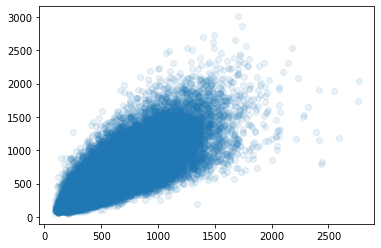

In [23]:
plt.scatter(A2@x['x'],b, alpha=0.1)

(array([5131., 3558., 1859.,  991.,  281.,  159.,  121.,  117.,  150.,
          25.]),
 array([0.01645362, 0.08480826, 0.1531629 , 0.22151753, 0.28987217,
        0.35822681, 0.42658145, 0.49493609, 0.56329072, 0.63164536,
        0.7       ]),
 <a list of 10 Patch objects>)

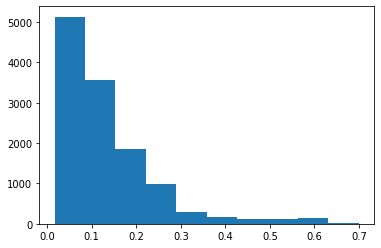

In [24]:
plt.hist(x['x'])

In [7]:
test = pd.read_csv('lion_filt2_with_vel_man.csv')
test

C:\Users\comp\anaconda3\envs\geopandas_env\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (112,113,114,115,120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,node_low,node_high,index,objectid,street,safstreetname,featuretyp,segmenttyp,incexflag,...,toright,join_id,shape_length,shape,feature_filt,DG_node,seg_id,path_count,vel_ub,vels
0,88,12377,12380,1,87352,BATTERY PLACE,,0,U,,...,63,1063501000000,262.777812,MULTILINESTRING ((979278.6453737766 196555.535...,True,"[(12377, 12380, {'weight': 262.777812431198}),...",88,23,0.032727,0.130817
1,89,12377,95550,4,87355,1 PLACE,,0,U,,...,0,1248301020000,293.100274,MULTILINESTRING ((979537.9623861015 196418.925...,True,"[(95550, 12377, {'weight': 293.100274116421})]",89,30,0.032727,0.186943
2,90,12377,9045700,23207,110540,BATTERY PLACE,,0,U,,...,49,1063501000000,257.206975,MULTILINESTRING ((979273.6863735467 196300.776...,True,"[(9045700, 12377, {'weight': 257.206974716654}...",90,53,0.032727,0.107439
3,92,12380,12383,9104,96451,BATTERY PLACE,,0,U,,...,81,1063501000000,259.416004,MULTILINESTRING ((979377.4639784694 196797.795...,True,"[(12380, 12383, {'weight': 259.416003850283}),...",92,30,0.032727,0.190009
4,93,12380,95551,14750,102099,2 PLACE,,0,U,,...,0,1399301000000,267.122914,MULTILINESTRING ((979610.9379895627 196668.009...,True,"[(95551, 12380, {'weight': 267.122913733364}),...",93,3,0.032727,0.246946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12387,16305,9055757,9055759,7240,94590,FRANKLIN D ROOSEVELT DRIVE,,0,R,,...,0,1254501060000,22.869679,MULTILINESTRING ((990751.8832187355 199689.574...,True,"[(9055759, 9055757, {'weight': 22.869679041160...",16305,6,0.020455,0.097745
12388,16308,9055762,9055767,1748,89090,FDR DRIVE EXIT 4 SOUTHBOUND,,0,E,,...,0,1804401000000,16.091354,MULTILINESTRING ((990757.5066189915 199782.209...,True,"[(9055762, 9055767, {'weight': 16.091354441713...",16308,1,0.016364,0.116364
12389,16309,9055764,9055765,9068,96416,FDR DRIVE EXIT 4 SOUTHBOUND,,0,E,,...,0,1804401000000,22.842417,MULTILINESTRING ((990732.1588177979 199721.621...,True,"[(9055764, 9055765, {'weight': 22.842417423813...",16309,1,0.016364,0.116364
12390,16310,9055802,9055804,14428,101778,CBE NB ENTRANCE RIVERSIDE DRV,,0,E,,...,0,1812301000000,79.696348,MULTILINESTRING ((1000385.485576302 248664.698...,True,"[(9055802, 9055804, {'weight': 79.69634773692})]",16310,1,0.016364,0.116364


In [14]:
pred = A2@test['vels']

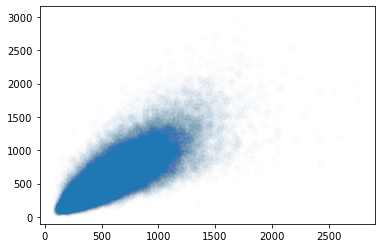

In [23]:
plt.scatter(pred,b, alpha=0.01)

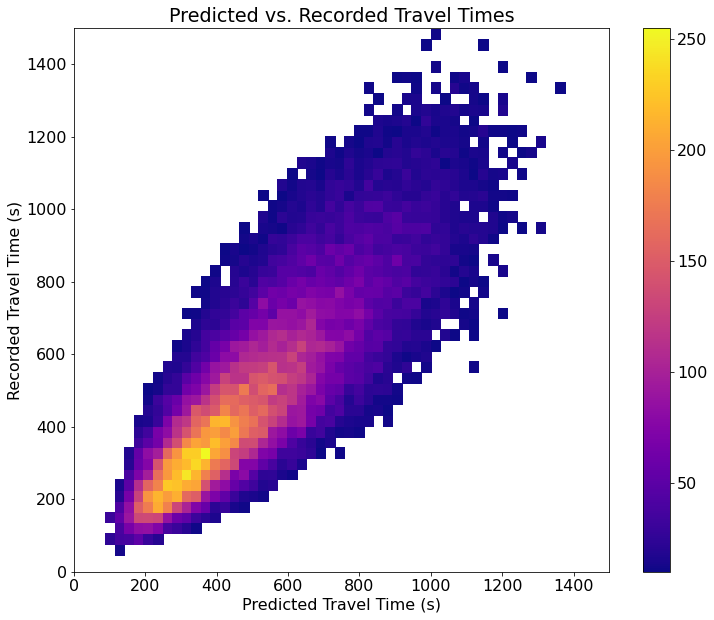

In [119]:
#fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
h,xedges,yedges,image = plt.hist2d(pred, b, bins=100, cmin=10, cmap = 'plasma')
plt.xlim(0,1500) 
plt.ylim(0,1500) 
ax.set_ylabel('Recorded Travel Time (s)')
ax.set_xlabel('Predicted Travel Time (s)')
ax.set_title('Predicted vs. Recorded Travel Times')
fig.colorbar(image)
plt.savefig('nyc_taxis_predictions.png',bbox_inches='tight')
#fig.save('')

In [64]:
image

(-2.0, 2.0)

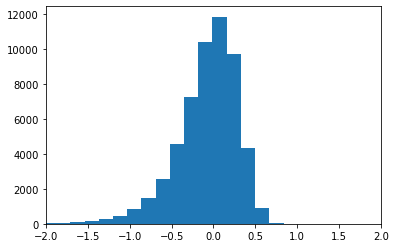

In [75]:
plt.hist((b-pred)/b,bins=40)
plt.xlim(-2,2)

(-2.0, 2.0)

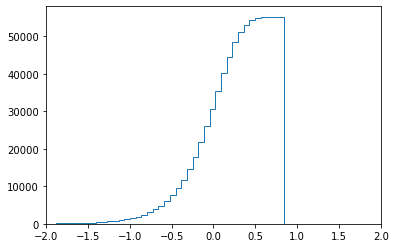

In [91]:
n, bins, patches = plt.hist((b-pred)/b,bins=100,cumulative=True, histtype='step')
#plt.plot(bins,n)
plt.xlim(-2,2)

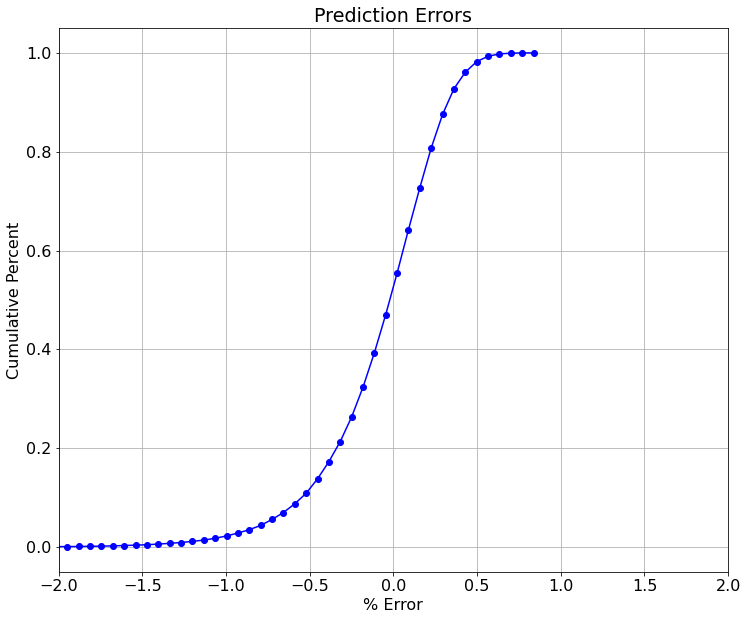

In [118]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(bins[1:],n/max(n),'-ob')
plt.xlim(-2,2)
plt.grid(which='major', axis='both')
ax.set_ylabel('Cumulative Percent')
ax.set_xlabel('% Error')
ax.set_title('Prediction Errors')
plt.savefig('nyc_taxis_prediction_errors.png',bbox_inches='tight')